In [53]:
#!pip install hmmlearn

     |████████████████████████████████| 361 kB 1.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

###  Считаем все 4 тома "Война и мир" в переменную wap, оставив русские буквы и пробелы.

In [27]:
with open('tom_1.txt', 'r') as tom1, open('tom_2.txt', 'r') as tom2,open('tom_3.txt', 'r') as tom3, open('tom_4.txt', 'r') as tom4:
    wap = tom1.read().lower() + tom2.read().lower() + tom3.read().lower() + tom4.read().lower()
wap = re.sub(r'[^а-яё]',r' ', wap) 

#### Запишем в переменную alphabet русский словарь в виде строки. Далее пройдем итератором по строке и составим словарь {'буква': индекс}

In [29]:
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
a_position = {l: i for i, l in enumerate(alphabet)}

In [32]:
len(a_position)

33

#### С помощью numpy создадим матрицу, заполненную нулями, размером равным длине нашего словаря alphabet.

In [35]:
probab = np.zeros((len(alphabet), len(alphabet)))

In [36]:
probab

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
for cp, cn in zip(wap[:-1], wap[1:]):
    try:
        probab[a_position[cp], a_position[cn]] += 1
    except:
        continue

In [42]:
probab = (probab / probab.sum(axis=1)[:, None])

#### Создадим датафрейм

In [43]:
df = pd.DataFrame(probab, index=(i for i in alphabet), columns=(c for c in alphabet))

#### С помощью библиотеки seeborn постоим матрицу переходных вероятностей.

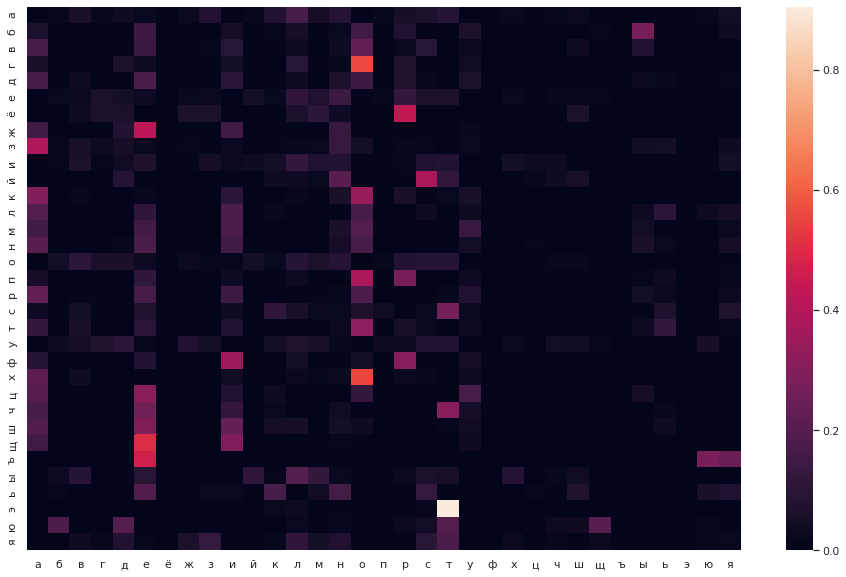

In [47]:
plt.figure(figsize=(16,10))
sns.heatmap(df)
plt.show()

#### Посчитаем вероятность встретить строку из 4 символов ('п' -> 'р')

In [50]:
start_char = a_position['п']
end_char = a_position['р']
pr = 1. / len(alphabet)
for c1 in alphabet:
    for c2 in alphabet:  
        proba = pr * probab[start_char, a_position[c1]] * probab[a_position[c1], a_position[c2]] * probab[a_position[c2], end_char]
    if proba > 0:
        print(''.join(['п', c1, c2, 'р']), proba)

паяр 4.581985332281102e-07
пеяр 1.4394266693909144e-07
пияр 3.1321341866000087e-07
пляр 3.195385940956135e-07
пмяр 7.963914060824204e-11
пняр 3.08014893176238e-08
пояр 6.300874360076641e-07
ппяр 5.198468066889215e-09
пряр 1.5062718814119952e-06
псяр 3.0520966067074272e-09
птяр 4.309863722488477e-09
пуяр 2.2747029702662476e-08
пцяр 1.0074087976964202e-10
пшяр 2.1474199325589203e-12
пыяр 1.3904155412685502e-10
пьяр 5.530165407964169e-07
пяяр 6.072726089434658e-08


#### Посчитаем теперь для строки из 8 символов начинающейся с буквы "б"

In [51]:
s = []
start_char = 'б'
s.append(start_char)
length = 7
for i in range(length):
    index = a_position[s[i]]
    next_char = np.random.choice(list(alphabet), p=probab[index])
    s.append(next_char)

print (''.join(s))

бихостос


### Построим ряд через HMM.

In [54]:
from hmmlearn.hmm import GaussianHMM

In [73]:
monthly_sales = pd.read_csv("../data/monthly-sales-of-company-x-jan-6.csv")

In [74]:
monthly_sales.head(3)

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73


In [75]:
monthly_sales = monthly_sales['Count']

In [76]:
values = monthly_sales.values.reshape(-1,1)
values

array([[154],
       [ 96],
       [ 73],
       [ 49],
       [ 36],
       [ 59],
       [ 95],
       [169],
       [210],
       [278],
       [298],
       [245],
       [200],
       [118],
       [ 90],
       [ 79],
       [ 78],
       [ 91],
       [167],
       [169],
       [289],
       [347],
       [375],
       [203],
       [223],
       [104],
       [107],
       [ 85],
       [ 75],
       [ 99],
       [135],
       [211],
       [335],
       [460],
       [488],
       [326],
       [346],
       [261],
       [224],
       [141],
       [148],
       [145],
       [223],
       [272],
       [445],
       [560],
       [612],
       [467],
       [518],
       [404],
       [300],
       [210],
       [196],
       [186],
       [247],
       [343],
       [464],
       [680],
       [711],
       [610],
       [613],
       [392],
       [273],
       [322],
       [189],
       [257],
       [324],
       [404],
       [677],
       [858],
       [895],
      

In [77]:
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.45859834487584
3 -465.47589432498637
4 -454.5453273063033
5 -447.66570883789535


Fitting a model with 79 free scalar parameters with only 77 data points will result in a degenerate solution.


6 -442.9206760697119
7 -433.2011958611599


Fitting a model with 98 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


8 -427.24430672993765
9 -420.0421620328055


Fitting a model with 142 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 77 data points will result in a degenerate solution.


10 -415.2820492582641
11 -409.5817141056568


Fitting a model with 194 free scalar parameters with only 77 data points will result in a degenerate solution.


12 -403.1629483350276


Fitting a model with 223 free scalar parameters with only 77 data points will result in a degenerate solution.


13 -392.33383658385185
14 -387.53159227963084


Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


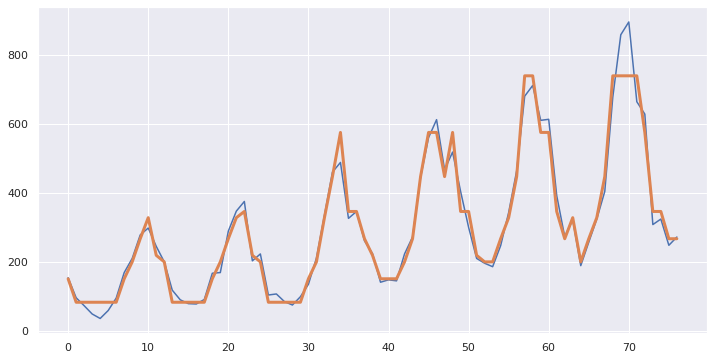

In [78]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)